In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import linalg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

m = 10000
X1 = 6 * np.random.rand(m, 1)-3
X2 = 6 * np.random.rand(m, 1)-3
X3 = 6 * np.random.rand(m, 1)-3
y = 2.0 + 1.0*X1 + 0.5*X1**2 + 0.25*X1**3 + 0.5*X2**2 +np.random.randn(m, 1) 
#X_new = np.array([[0], [2]])
X = np.asarray(list(zip(X1.reshape(-1), X2.reshape(-1), X3.reshape(-1))))
 
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=5) 
X_poly = poly_features.fit_transform(X)

In [24]:
#1. Split the data into a training set of first 8,000 instances, 
#a validation set of the next 1,000 instances, and a test set of the rest 1,000 instances.
X_train, X_test,y_train,y_test = train_test_split(X_poly, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

#3. Obtain the optimal values of the model parameters by directly evaluating the 
#normal equation for plain polynomial regression (no regularization). 
#In addition, apply the trained model to the test set and evaluate the RMSE.
def RMSE_calculation(param1, param2):
    mse = mean_squared_error(param1, param2)
    rmse = np.sqrt(mse)
    return rmse
  
rgs=np.dot(np.dot(linalg.inv(np.dot(X_train.T,X_train)),X_train.T),y_train)
# target value predicted from our model
train_final_predictions = np.dot(X_train,rgs)
test_final_predictions = X_test.dot(rgs)
# RMSE
train_final_rmse = RMSE_calculation(y_train, train_final_predictions)
test_final_rmse = RMSE_calculation(y_test, test_final_predictions)

print('LinReg: train_RMSE : %.2f , test_RMSE : %.2f' %(train_final_rmse, test_final_rmse))

#4. Repeat Problem 3 for ridge polynomial regression 
#(use the closed-form solution for ridge regression).
W=np.identity(len(X_train[0]))
W[0][0]=0
rdg=np.dot(np.dot(linalg.inv(np.dot(X_train.T,X_train)+4*W),X_train.T),y_train)
print("RidgeReg:",rdg)
# target value predicted from our model
train_final_predictions = X_train.dot(rdg)
test_final_predictions = X_test.dot(rdg)
# RMSE
train_final_rmse = RMSE_calculation(y_train, train_final_predictions)
test_final_rmse = RMSE_calculation(y_test, test_final_predictions)

print('RidgeReg: train_RMSE : %.2f , test_RMSE : %.2f' %(train_final_rmse, test_final_rmse))






LinReg: train_RMSE : 0.99 , test_RMSE : 1.01
RidgeReg: [[ 1.95707235e+00]
 [ 9.74237773e-01]
 [-8.34751888e-04]
 [ 3.66046859e-04]
 [ 4.98484174e-01]
 [-2.51192845e-02]
 [-4.31426529e-03]
 [ 5.09179142e-01]
 [-5.77596527e-03]
 [ 2.46289215e-02]
 [ 2.46328802e-01]
 [ 1.34102880e-02]
 [-9.47933470e-03]
 [ 9.09215460e-03]
 [ 6.96594290e-04]
 [-3.91746987e-03]
 [ 1.04808251e-02]
 [-9.26994774e-03]
 [-1.15477996e-02]
 [ 4.78764674e-03]
 [ 1.01970120e-03]
 [ 2.19314371e-03]
 [ 7.37726594e-04]
 [-1.46345252e-03]
 [-2.40225136e-03]
 [-1.60644323e-03]
 [ 2.84213412e-03]
 [-3.69082951e-04]
 [ 8.86581819e-04]
 [ 1.08561976e-04]
 [-1.07640079e-03]
 [ 3.22754552e-04]
 [ 6.26787718e-04]
 [ 1.82179614e-03]
 [-2.85239723e-03]
 [ 4.21464798e-04]
 [-2.34002902e-03]
 [ 9.01193294e-04]
 [-1.31112550e-03]
 [-2.30343284e-04]
 [ 2.90479273e-03]
 [ 4.90698485e-04]
 [-8.21233218e-04]
 [-9.58478348e-05]
 [ 7.56136915e-04]
 [ 4.98703182e-04]
 [-1.75312096e-04]
 [-9.49790627e-04]
 [ 4.49253434e-05]
 [-6.60988948e

In [25]:
#5. We now use the mini-batch GD with mini-batch size 100. Apply the plain polynomial regression, 
#and draw the corresponding learning curves of this model for the training and validation sets,
#showing the RMSE against the number of epochs. In addition, apply the trained model to the test 
#set and evaluate the RMSE.
train_num = X_train.shape[0]
feature_num = X_train.shape[1]
theta = np.random.randn(feature_num,1)

GD_train_rmse = []
GD_val_rmse = []

GD_batch_train_rmse = []
GD_batch_val_rmse = []

initialized_theta_train_RMSE = RMSE_calculation(np.dot(X_train,theta), y_train)
initialized_theta_val_RMSE = RMSE_calculation(np.dot(X_test,theta), y_test)

GD_train_rmse.append(initialized_theta_train_RMSE)
GD_val_rmse.append(initialized_theta_val_RMSE)
GD_batch_train_rmse.append(initialized_theta_train_RMSE)
GD_batch_val_rmse.append(initialized_theta_val_RMSE)
print('RMSE of the initialized theta - train_RMSE : %.2f, val_RMSE : %.2f' %(initialized_theta_train_RMSE, initialized_theta_val_RMSE))

#execute the mini-batch GD
batch_size = 100
n_epoch = 100
eta = 0.00005
for epoch in range(n_epoch):
    # shuffle
    shuffle_indices = np.random.permutation(train_num)
    feature_shuffled = X_train[shuffle_indices,:]
    target_shuffled = y_train[shuffle_indices,:]
    for i in range(0, train_num, batch_size):
        batch_x = feature_shuffled[i:i+batch_size,:]
        batch_y = target_shuffled[i:i+batch_size,:]
        gradient = 2.0/batch_size * np.dot(batch_x.T , np.dot(batch_x, theta) - batch_y)
        theta = theta - eta * gradient
        # train error after batch update 
        train_batch_predictions = np.dot(X_train, theta)
        train_batch_rmse = RMSE_calculation(y_train, train_batch_predictions)
        GD_batch_train_rmse.append(train_batch_rmse)
        # test error after batch update
        val_batch_predictions = np.dot(X_test, theta)
        val_batch_rmse = RMSE_calculation(y_test, val_batch_predictions)
        GD_batch_val_rmse.append(val_batch_rmse)  
    # train error after epoch 
    GD_train_predictions = np.dot(X_train, theta)
    GD_train_final_rmse = RMSE_calculation(y_train, GD_train_predictions)
    GD_train_rmse.append(GD_train_final_rmse)
    # val error after epoch 
    GD_val_predictions = np.dot(X_val, theta)
    GD_val_final_rmse = RMSE_calculation(y_val, GD_val_predictions)
    GD_val_rmse.append(GD_val_final_rmse)
    
    if epoch%10 == 0:
        print('%d번째 train_RMSE : %.2f, val_RMSE : %.2f' %(epoch, GD_train_final_rmse, GD_val_final_rmse))
        



RMSE of the initialized theta - train_RMSE : 223.58, val_RMSE : 210.72
0번째 train_RMSE : 19.81, val_RMSE : 19.64
10번째 train_RMSE : 5.50, val_RMSE : 5.57
20번째 train_RMSE : 4.44, val_RMSE : 4.53
30번째 train_RMSE : 4.27, val_RMSE : 4.18
40번째 train_RMSE : 3.50, val_RMSE : 3.55
50번째 train_RMSE : 3.48, val_RMSE : 3.43
60번째 train_RMSE : 3.01, val_RMSE : 3.06
70번째 train_RMSE : 2.82, val_RMSE : 2.83
80번째 train_RMSE : 2.63, val_RMSE : 2.62
90번째 train_RMSE : 2.47, val_RMSE : 2.54


Text(0, 0.5, 'RMSE')

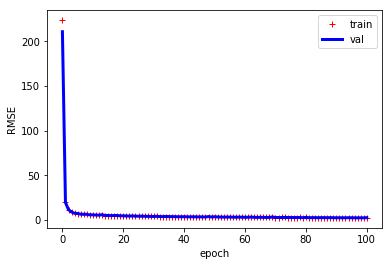

In [26]:
#Check for changes of RMSE as epoch increases.       
plt.plot(GD_train_rmse, "r+", linewidth=2, label="train")
plt.plot(GD_val_rmse, "b-", linewidth=3, label="val")
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('RMSE')

Text(0, 0.5, 'RMSE')

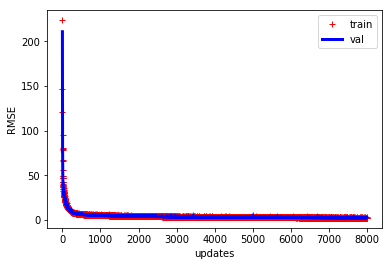

In [27]:
#Check for changes of RMSE as the number of updates increases.
plt.plot(GD_batch_train_rmse, "r+", linewidth=2, label="train")
plt.plot(GD_batch_val_rmse, "b-", linewidth=3, label="val")
plt.legend(loc='upper right')
plt.xlabel('updates')
plt.ylabel('RMSE')

In [111]:
#6. Repeat Problem 5 for ridge polynomial regression. 
#Adjust the hyperparameter 𝛼 to obtain the best results.

theta = np.random.randn(feature_num,1)
theta_bkp = theta # back-up the theta values

GD_train_rmse = []
GD_val_rmse = []

GD_batch_train_rmse = []
GD_batch_val_rmse = []

initialized_theta_train_RMSE = RMSE_calculation(np.dot(X_train,theta), y_train)
initialized_theta_val_RMSE = RMSE_calculation(np.dot(X_test,theta), y_test)

GD_train_rmse.append(initialized_theta_train_RMSE)
GD_val_rmse.append(initialized_theta_val_RMSE)
GD_batch_train_rmse.append(initialized_theta_train_RMSE)
GD_batch_val_rmse.append(initialized_theta_val_RMSE)

print('RMSE of the initialized theta - train_RMSE : %.2f, val_RMSE : %.2f' %(initialized_theta_train_RMSE, initialized_theta_val_RMSE))

#execute the mini-batch GD for ridge reg.
lamda= 204
batch_size = 100
n_epoch = 100
eta1 = 0.00016

for epoch in range(n_epoch):
    
    # shuffle
    shuffle_indices = np.random.permutation(train_num)
    feature_shuffled = X_train[shuffle_indices,:]
    target_shuffled = y_train[shuffle_indices,:]
    
    for i in range(0, train_num, batch_size):
        batch_x = feature_shuffled[i:i+batch_size,:]
        batch_y = target_shuffled[i:i+batch_size,:]
        intheta=theta
        intheta[0][0]=0
        theta = theta - eta1 * (1/batch_size)*((batch_x.T @((np.dot(batch_x,theta))-batch_y)) + lamda * intheta )
        
        # train error after batch update 
        train_batch_predictions = np.dot(X_train, theta)
        train_batch_rmse = RMSE_calculation(y_train, train_batch_predictions)
        GD_batch_train_rmse.append(train_batch_rmse)
        
        # test error after batch update
        val_batch_predictions = np.dot(X_test, theta)
        val_batch_rmse = RMSE_calculation(y_test, val_batch_predictions)
        GD_batch_val_rmse.append(val_batch_rmse)
        
    # train error after epoch 
    GD_train_predictions = np.dot(X_train, theta)
    GD_train_final_rmse = RMSE_calculation(y_train, GD_train_predictions)
    GD_train_rmse.append(GD_train_final_rmse)
    
    # val error after epoch 
    GD_val_predictions = np.dot(X_val, theta)
    GD_val_final_rmse = RMSE_calculation(y_val, GD_val_predictions)
    GD_val_rmse.append(GD_val_final_rmse)
    
    if epoch%10 == 0:
        print('%d번째 train_RMSE : %.2f, val_RMSE : %.2f' %(epoch, GD_train_final_rmse, GD_val_final_rmse))



#####################################################




RMSE of the initialized theta - train_RMSE : 328.00, val_RMSE : 303.83
0번째 train_RMSE : 14.90, val_RMSE : 14.23
10번째 train_RMSE : 3.38, val_RMSE : 3.34
20번째 train_RMSE : 2.14, val_RMSE : 2.13
30번째 train_RMSE : 1.87, val_RMSE : 1.91
40번째 train_RMSE : 1.93, val_RMSE : 1.90
50번째 train_RMSE : 1.61, val_RMSE : 1.67
60번째 train_RMSE : 1.63, val_RMSE : 1.65
70번째 train_RMSE : 1.56, val_RMSE : 1.61
80번째 train_RMSE : 1.55, val_RMSE : 1.60
90번째 train_RMSE : 1.59, val_RMSE : 1.64


Text(0, 0.5, 'RMSE')

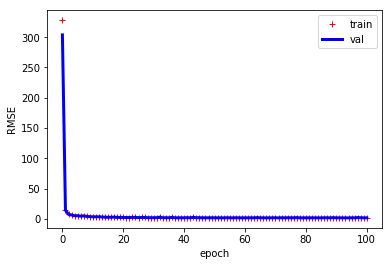

In [113]:
#Check for changes of RMSE as epoch increases.       
plt.plot(GD_train_rmse, "r+", linewidth=2, label="train")
plt.plot(GD_val_rmse, "b-", linewidth=3, label="val")
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('RMSE')


Text(0, 0.5, 'RMSE')

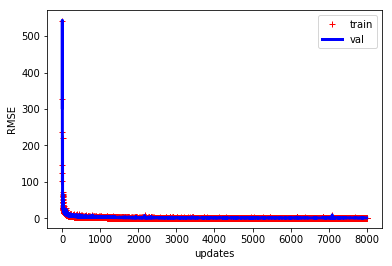

In [112]:
#Check for changes of RMSE as the number of updates increases.
plt.plot(GD_batch_train_rmse, "r+", linewidth=2, label="train")
plt.plot(GD_batch_val_rmse, "b-", linewidth=3, label="val")
plt.legend(loc='upper right')
plt.xlabel('updates')
plt.ylabel('RMSE')


In [70]:
#7. Repeat Problem 6 for lasso polynomial regression.  
#Adjust the hyperparameter 𝛼 to obtain the best results.
theta = np.random.randn(feature_num,1)
theta_bkp = theta # back-up the theta values

GD_train_rmse = []
GD_val_rmse = []

GD_batch_train_rmse = []
GD_batch_val_rmse = []

initialized_theta_train_RMSE = RMSE_calculation(np.dot(X_train,theta), y_train)
initialized_theta_val_RMSE = RMSE_calculation(np.dot(X_test,theta), y_test)

GD_train_rmse.append(initialized_theta_train_RMSE)
GD_val_rmse.append(initialized_theta_val_RMSE)
GD_batch_train_rmse.append(initialized_theta_train_RMSE)
GD_batch_val_rmse.append(initialized_theta_val_RMSE)

print('RMSE of the initialized theta - train_RMSE : %.2f, val_RMSE : %.2f' %(initialized_theta_train_RMSE, initialized_theta_val_RMSE))

#execute the mini-batch GD for lasso reg.
lamda= 26
batch_size = 100
n_epoch = 100
eta2 = 0.00007 #learning rate

for epoch in range(n_epoch):
    
    # shuffle
    shuffle_indices = np.random.permutation(train_num)
    feature_shuffled = X_train[shuffle_indices,:]
    target_shuffled = y_train[shuffle_indices,:]
    
    for i in range(0, train_num, batch_size):
        batch_x = feature_shuffled[i:i+batch_size,:]
        batch_y = target_shuffled[i:i+batch_size,:]
        intheta=theta
        intheta[0][0]=0
        theta = theta - eta2*2/batch_size*(batch_x.T.dot(batch_x.dot(theta)-batch_y) + lamda*np.sign(intheta))
        
        # train error after batch update 
        train_batch_predictions = np.dot(X_train, theta)
        train_batch_rmse = RMSE_calculation(y_train, train_batch_predictions)
        GD_batch_train_rmse.append(train_batch_rmse)
        
        # test error after batch update
        val_batch_predictions = np.dot(X_test, theta)
        val_batch_rmse = RMSE_calculation(y_test, val_batch_predictions)
        GD_batch_val_rmse.append(val_batch_rmse)
        
    # train error after epoch 
    GD_train_predictions = np.dot(X_train, theta)
    GD_train_final_rmse = RMSE_calculation(y_train, GD_train_predictions)
    GD_train_rmse.append(GD_train_final_rmse)
    
    # val error after epoch 
    GD_val_predictions = np.dot(X_val, theta)
    GD_val_final_rmse = RMSE_calculation(y_val, GD_val_predictions)
    GD_val_rmse.append(GD_val_final_rmse)
    
    if epoch%10 == 0:
        print('%d번째 train_RMSE : %.2f, val_RMSE : %.2f' %(epoch, GD_train_final_rmse, GD_val_final_rmse))

RMSE of the initialized theta - train_RMSE : 166.91, val_RMSE : 164.62
0번째 train_RMSE : 14.77, val_RMSE : 14.41
10번째 train_RMSE : 3.92, val_RMSE : 3.80
20번째 train_RMSE : 3.12, val_RMSE : 3.13
30번째 train_RMSE : 2.64, val_RMSE : 2.60
40번째 train_RMSE : 2.39, val_RMSE : 2.35
50번째 train_RMSE : 2.17, val_RMSE : 2.20
60번째 train_RMSE : 1.80, val_RMSE : 1.79
70번째 train_RMSE : 1.63, val_RMSE : 1.64
80번째 train_RMSE : 1.52, val_RMSE : 1.52
90번째 train_RMSE : 1.43, val_RMSE : 1.44


Text(0, 0.5, 'RMSE')

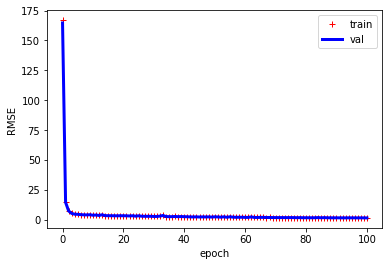

In [71]:
#Check for changes of RMSE as epoch increases.       
plt.plot(GD_train_rmse, "r+", linewidth=2, label="train")
plt.plot(GD_val_rmse, "b-", linewidth=3, label="val")
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('RMSE')

Text(0, 0.5, 'RMSE')

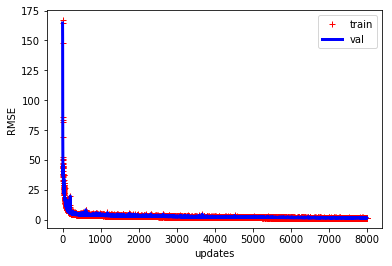

In [72]:
#Check for changes of RMSE as the number of updates increases.
plt.plot(GD_batch_train_rmse, "r+", linewidth=2, label="train")
plt.plot(GD_batch_val_rmse, "b-", linewidth=3, label="val")
plt.legend(loc='upper right')
plt.xlabel('updates')
plt.ylabel('RMSE')